In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
final_dataset['Current_year']=2021

In [12]:
final_dataset['No_Years']=final_dataset['Current_year']-final_dataset['Year']

In [13]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [14]:
final_dataset.drop(['Year'], axis=1, inplace=True)

In [15]:
final_dataset.drop(['Current_year'], axis=1, inplace=True)

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [17]:
final_dataset=pd.get_dummies(final_dataset, drop_first=True)

In [18]:
pd.options.display.float_format = '{:,.2f}'.format

In [19]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [20]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.00,0.88,0.03,-0.09,-0.24,0.55,-0.54,-0.55,-0.37
Present_Price,0.88,1.00,0.20,0.01,0.05,0.47,-0.47,-0.51,-0.35
Kms_Driven,0.03,0.20,1.00,0.09,0.52,0.17,-0.17,-0.10,-0.16
Owner,-0.09,0.01,0.09,1.00,0.18,-0.05,0.06,0.12,-0.05
No_Years,-0.24,0.05,0.52,0.18,1.00,-0.06,0.06,0.04,-0.00
Fuel_Type_Diesel,0.55,0.47,0.17,-0.05,-0.06,1.00,-0.98,-0.35,-0.10
Fuel_Type_Petrol,-0.54,-0.47,-0.17,0.06,0.06,-0.98,1.00,0.36,0.09
Seller_Type_Individual,-0.55,-0.51,-0.10,0.12,0.04,-0.35,0.36,1.00,0.06
Transmission_Manual,-0.37,-0.35,-0.16,-0.05,-0.00,-0.10,0.09,0.06,1.00


In [21]:
import seaborn as sns

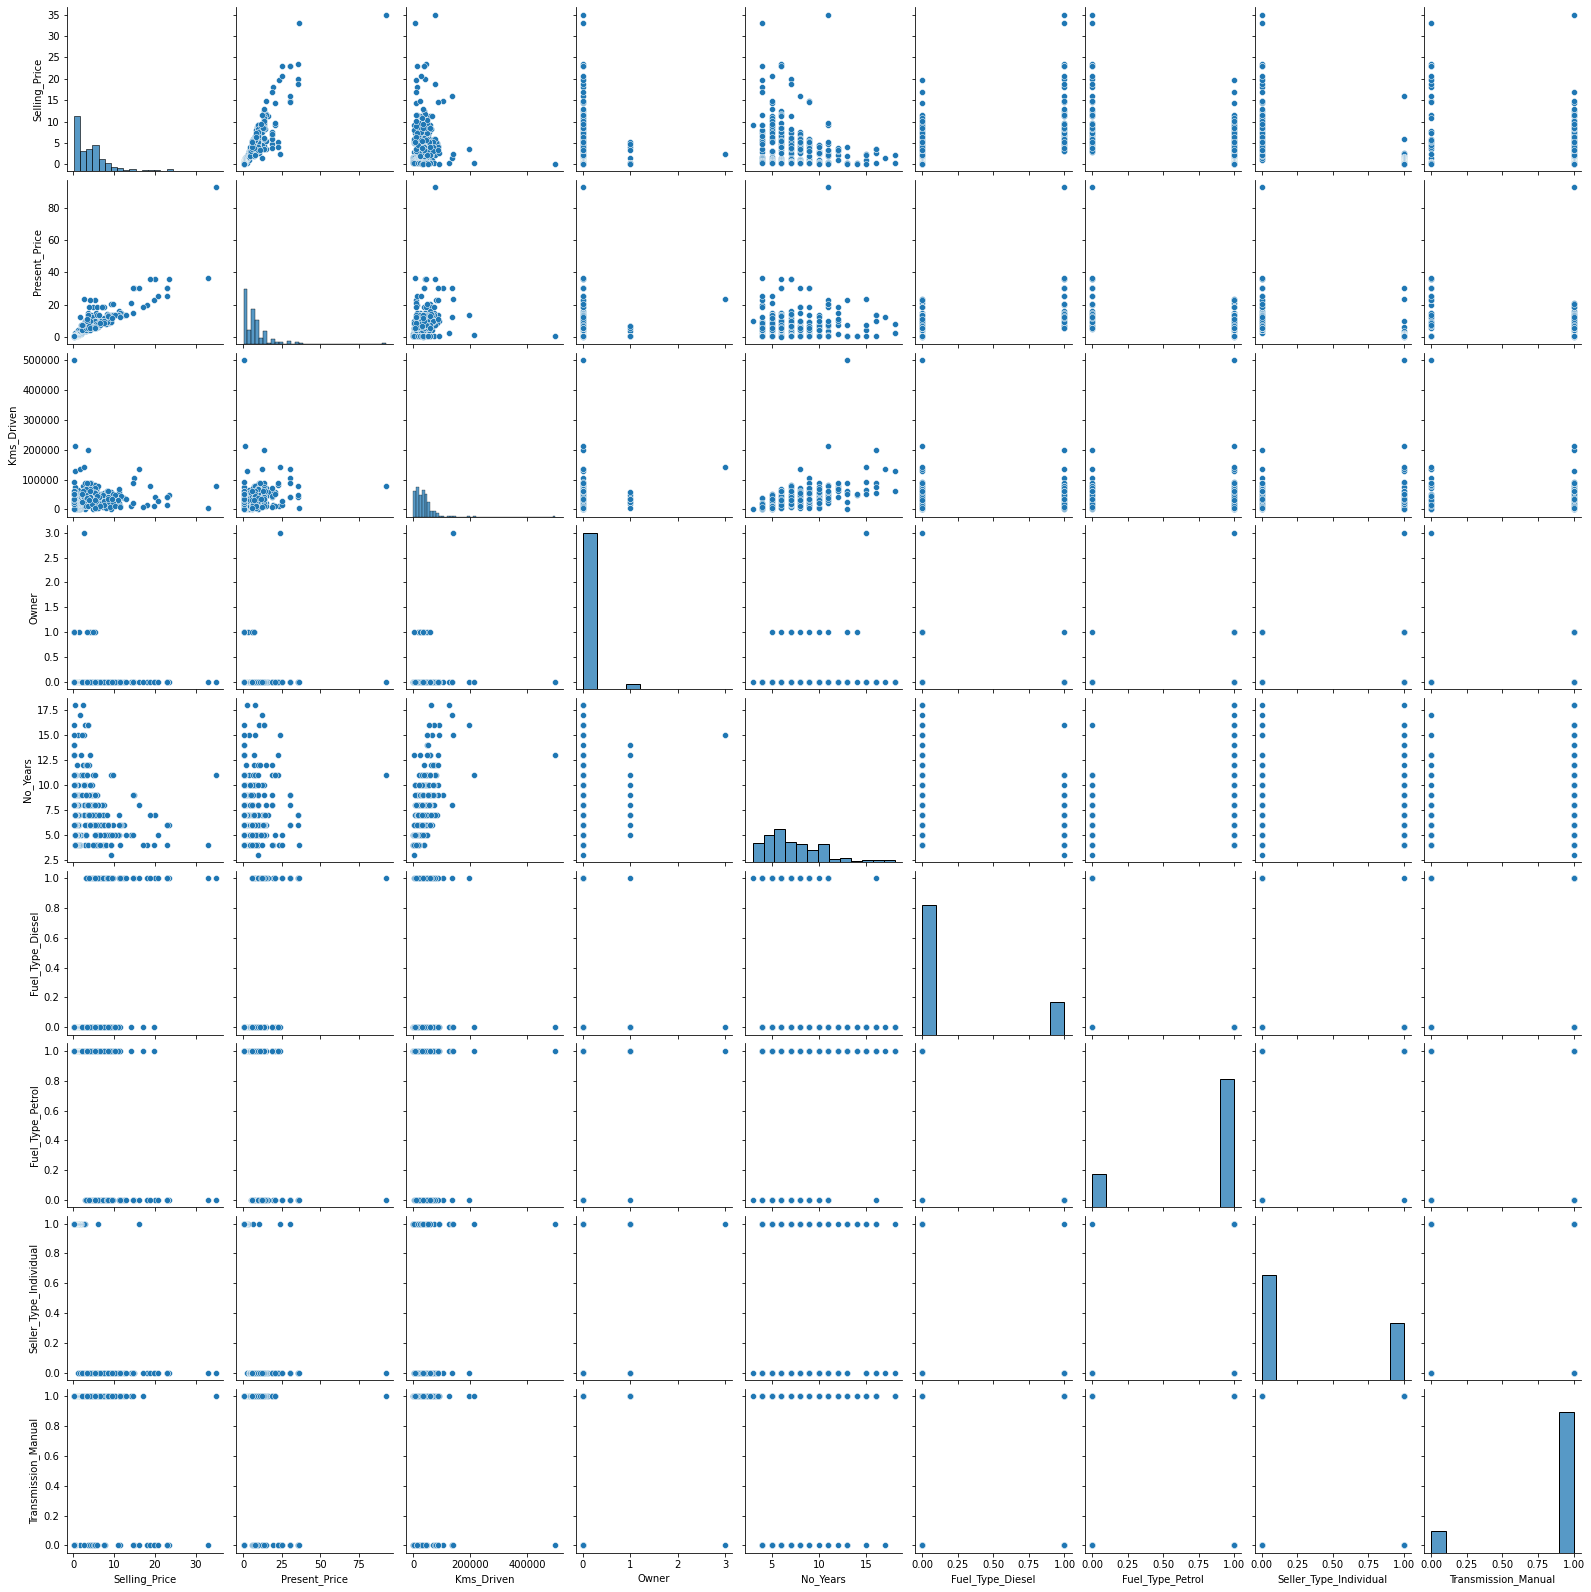

In [22]:
sns.pairplot(final_dataset)

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline

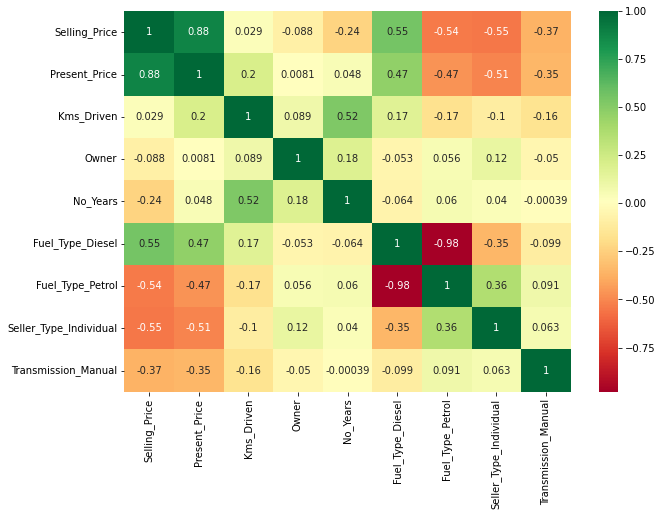

In [25]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,7))#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]



In [27]:
X.head()

,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [28]:
y.head()

0   3.35
1   4.75
2   7.25
3   2.85
4   4.60
Name: Selling_Price, dtype: float64

In [50]:
import sklearn
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)




ExtraTreesRegressor()

In [51]:
print(model.feature_importances_)

[0.39250378 0.04015827 0.00041809 0.07864634 0.21553408 0.01085344
 0.13590118 0.12598482]


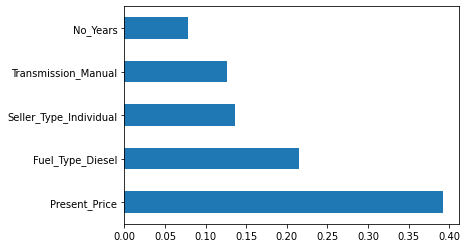

In [52]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [83]:
X_train.shape


(210, 8)

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [85]:
####HyperParamteres
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [86]:
#Randomized search CV

#Number of trees in random forests
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num =12)]
#Numbers of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#max_depth.append(none)
#Minimum number of sample required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
#Creatiing the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [89]:
#hyperparameters
rf = RandomForestRegressor()

In [90]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [91]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [92]:
predictions=rf_random.predict(X_test)

In [93]:
predictions

array([ 7.35082215,  2.67923449,  2.75672794,  7.35082215, 10.80817666,
        5.5152942 ,  0.97792223,  0.6235777 ,  0.5061857 ,  7.17475544,
        0.25125318,  3.60988677,  0.42254031, 10.23144758,  6.02998205,
       14.25180992,  4.60553077,  4.95254577,  4.71255729, 21.36912373,
        1.12039918,  5.45256865,  0.36201845,  0.39904871,  0.2381412 ,
        1.18063618, 17.4818757 , 10.25999475,  7.34789952,  7.37692816,
        1.18261129,  5.74755393, 10.27026722,  0.53453695,  3.78071117,
        2.82169807,  0.25358515,  7.72370351,  5.28805467,  0.97141391,
        5.98789142,  4.59167697,  1.20350846,  3.77091423,  3.35543764,
        5.15668884,  0.54779116,  5.51555403, 21.1633891 ,  4.35800067,
        5.21850822,  7.13529311,  1.18261129,  5.43513638,  5.31808867,
        0.32916582,  5.27215713,  5.59050648,  1.18261129,  4.56452511,
        0.43371694,  1.18261129,  0.42254031,  6.71835805,  2.94349224,
        7.86488842,  4.77155359,  7.30325118,  0.34554059,  5.89

C:\Users\sidra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

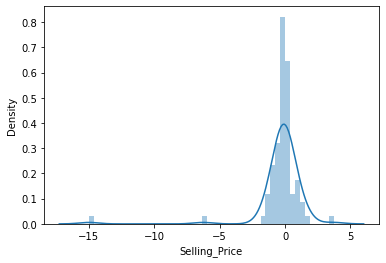

In [94]:
sns.distplot(y_test-predictions)

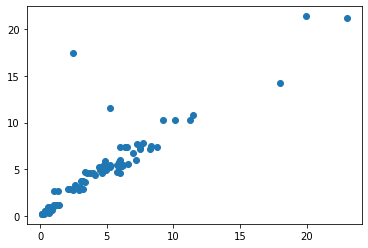

In [95]:
plt.scatter(y_test,predictions)

In [98]:
import pickle
file = open('random_forest_regression_model.pkl','wb')
pickle.dump(rf_random, file)